# BIKE SHARING CASE STUDY

Understand the factors affecting the demand for the shared bikes in the American market. Discern the following:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

In [73]:
# import all libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Reading and Understanding the Data

In [74]:
# read the dataset
day_df = pd.read_csv('day.csv')
day_df.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Inspect the various aspects of the bike sharing dataframe

In [75]:
# check the shape
day_df.shape

(730, 16)

In [76]:
# describe the data
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [77]:
# check if null data exists
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [78]:
# no null data exists

# check the data types
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2: Fixing Data

- We can see year has values 0 and 1 for 2018 and 2019.
- Also few columns are redunandant and can be removed.
- Rename columns for readability.
- Change data types

In [79]:
# date column is of no use to us as we already have the values in month and day.
day_df.drop(['dteday'], axis=1,inplace=True)

In [80]:
# from the given data we can see that instant is an index column so we drop it.
day_df.drop(['instant'], axis=1,inplace=True)

In [81]:
# dropping the redundant variable holiday as the workingday column covers enough information that is required.
day_df.drop('holiday', axis=1,inplace=True)

In [82]:
# we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
day_df.drop(['casual','registered'], axis=1,inplace=True)
day_df.head()

season  yr  mnth  weekday  workingday  weathersit       temp     atemp  \
0       1   0     1        6           0           2  14.110847  18.18125   
1       1   0     1        0           0           2  14.902598  17.68695   
2       1   0     1        1           1           1   8.050924   9.47025   
3       1   0     1        2           1           1   8.200000  10.60610   
4       1   0     1        3           1           1   9.305237  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [83]:
# rename columns for readability

day_df.rename(columns={'mnth': 'month', 'yr': 'year', 'hum':'humidity','cnt':'count'}, inplace=True)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


# Step 3: Data Prepearation 

- Replace categorical variables with appropriate values.

In [84]:
# Categorical Variable Season
day_df['season'].replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"}, inplace=True)

In [85]:
# Categorical Variable: Weekday
day_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}, inplace=True)

In [86]:
# Categorical Variable: Weathersit
day_df['weathersit'].replace({1:"Clear_Few Clouds", 2:"Mist_cloudy", 3:"Light rain_Light snow_Thunderstorm", 4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'}, inplace=True)

In [87]:
# categorical variable: working_day
day_df['workingday'].replace({1:'WorkingDay', 0:'Holiday'}, inplace=True)

In [88]:
# categorical variable month
day_df['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)

In [89]:
day_df.head(5)

season  year month    weekday  workingday        weathersit       temp  \
0  Spring     0   Jan   Saturday     Holiday       Mist_cloudy  14.110847   
1  Spring     0   Jan     Sunday     Holiday       Mist_cloudy  14.902598   
2  Spring     0   Jan     Monday  WorkingDay  Clear_Few Clouds   8.050924   
3  Spring     0   Jan    Tuesday  WorkingDay  Clear_Few Clouds   8.200000   
4  Spring     0   Jan  Wednesday  WorkingDay  Clear_Few Clouds   9.305237   

      atemp  humidity  windspeed  count  
0  18.18125   80.5833  10.749882    985  
1  17.68695   69.6087  16.652113    801  
2   9.47025   43.7273  16.636703   1349  
3  10.60610   59.0435  10.739832   1562  
4  11.46350   43.6957  12.522300   1600

In [90]:
# cast to integer
day_df[['temp','atemp','humidity','windspeed','count']]=day_df[['temp','atemp','humidity','windspeed','count']].apply(pd.to_numeric)

# Step 3: Visualising the Data


- Identify if some predictors directly have a strong association with the outcome variable
- Visualise our data using matplotlib and seaborn.

### Visualising Numeric Variables

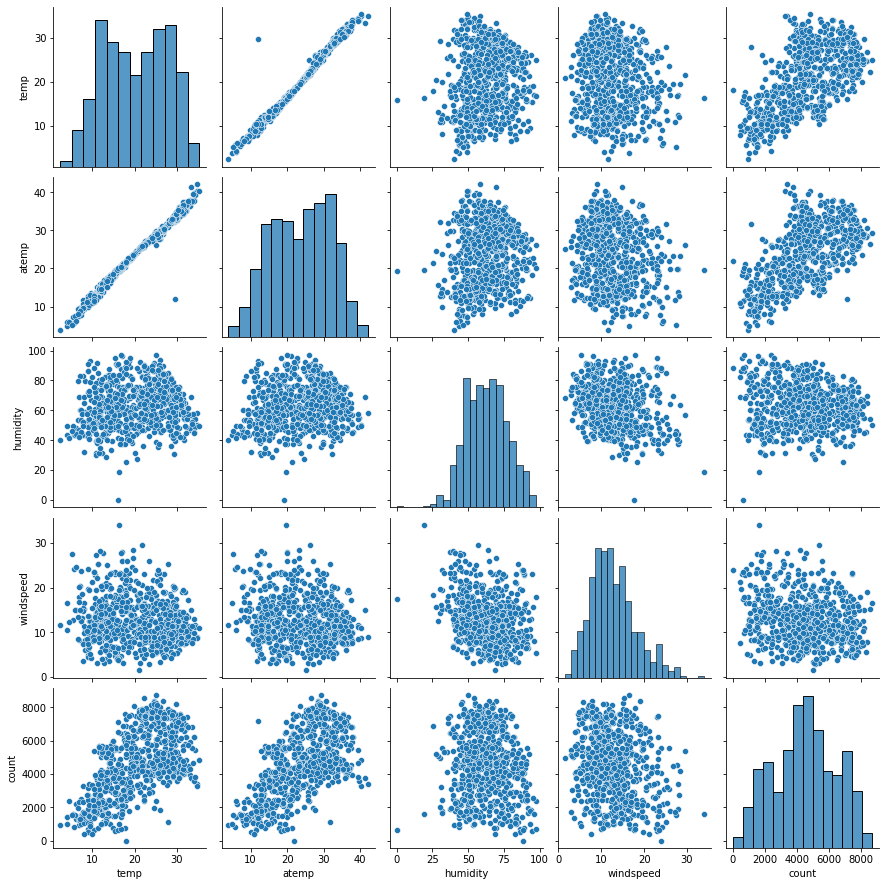

In [91]:
# let's make a pairplot of all numeric variables.
sns.pairplot(day_df, vars=['temp','atemp','humidity','windspeed',"count"])

<AxesSubplot:>

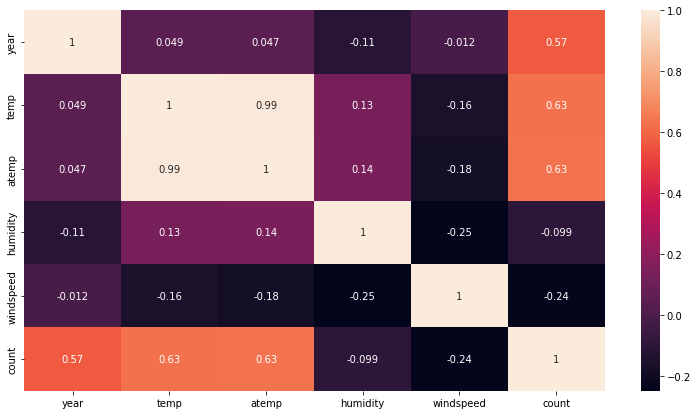

In [92]:
# let's check the correlation
plt.figure(figsize = (13, 7))
sns.heatmap(day_df.corr(), annot=True)

#### atemp and temp collinearity is 0.99, extremely high. Hence we can remove one of them to avoid multicollinearity.

In [93]:
day_df.drop('atemp', axis=1,inplace=True)
day_df.head(5)

season  year month    weekday  workingday        weathersit       temp  \
0  Spring     0   Jan   Saturday     Holiday       Mist_cloudy  14.110847   
1  Spring     0   Jan     Sunday     Holiday       Mist_cloudy  14.902598   
2  Spring     0   Jan     Monday  WorkingDay  Clear_Few Clouds   8.050924   
3  Spring     0   Jan    Tuesday  WorkingDay  Clear_Few Clouds   8.200000   
4  Spring     0   Jan  Wednesday  WorkingDay  Clear_Few Clouds   9.305237   

   humidity  windspeed  count  
0   80.5833  10.749882    985  
1   69.6087  16.652113    801  
2   43.7273  16.636703   1349  
3   59.0435  10.739832   1562  
4   43.6957  12.522300   1600

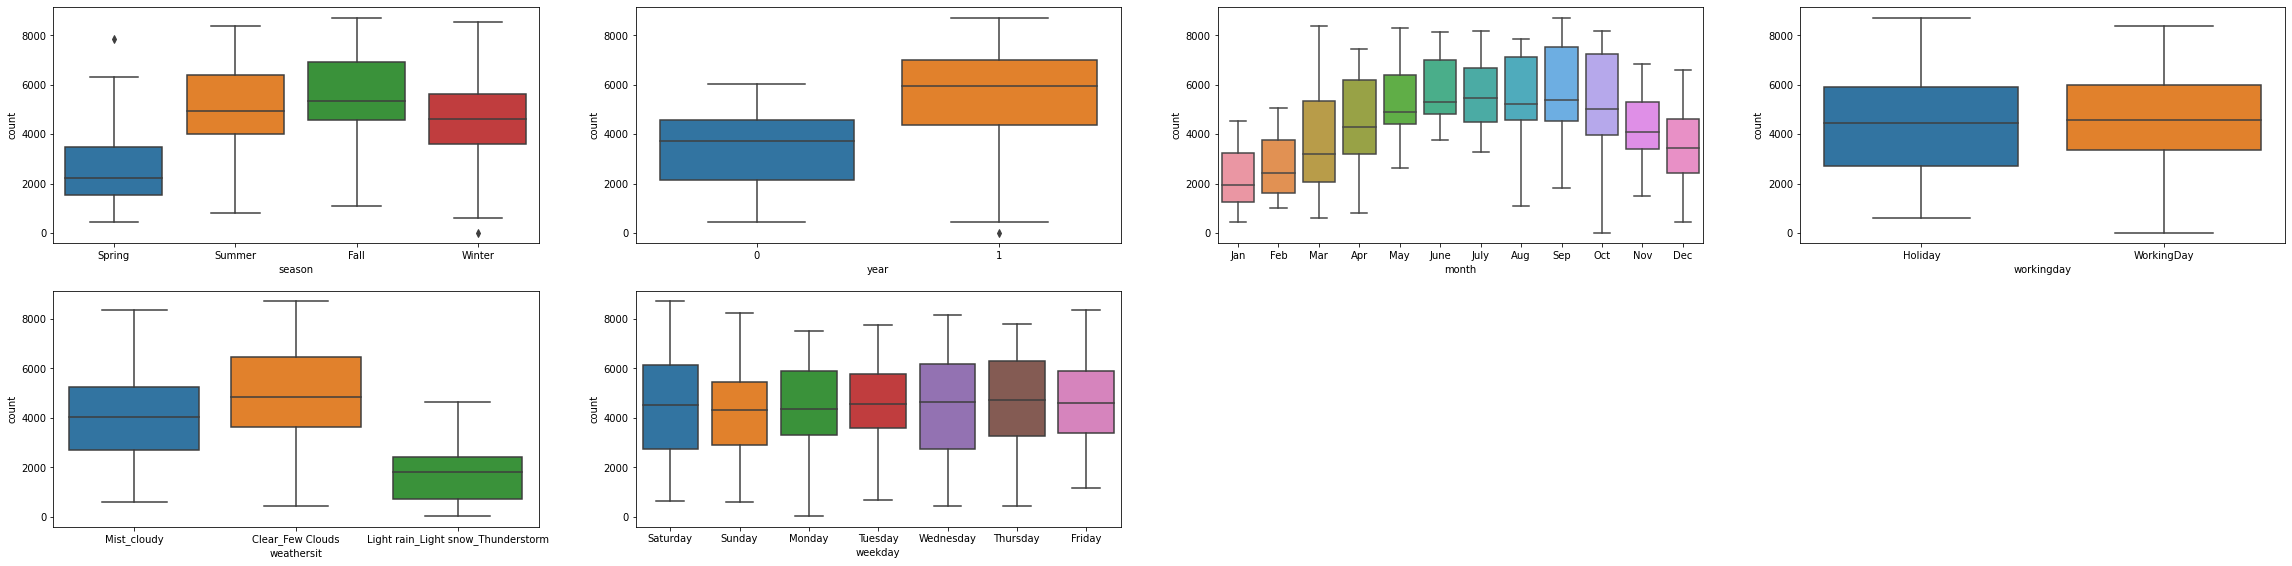

In [94]:
# Visualising categorical Variables to understand data better

plt.figure(figsize=(40, 20))
plt.subplot(4,4,1)
sns.boxplot(x = 'season', y = 'count', data = day_df)
plt.subplot(4,4,2)
sns.boxplot(x = 'year', y = 'count', data = day_df)
plt.subplot(4,4,3)
sns.boxplot(x = 'month', y = 'count', data = day_df)
plt.subplot(4,4,4)
sns.boxplot(x = 'workingday', y = 'count', data = day_df)
plt.subplot(4,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = day_df)
plt.subplot(4,4,6)
sns.boxplot(x = 'weekday', y = 'count', data = day_df)
plt.show()

# Step 4: Dummy Values For Categorical Value

In [95]:
# get the dummies value using drop first option
# we use drop first here to remove the extra column created in the process
seasons = pd.get_dummies(day_df['season'], drop_first=True)

weather = pd.get_dummies(day_df['weathersit'], drop_first=True)

month = pd.get_dummies(day_df['month'], drop_first=True)

week_day = pd.get_dummies(day_df['weekday'], drop_first=True)

working_day = pd.get_dummies(day_df['workingday'],drop_first=True)

In [96]:
# concat all the dummy columns created
day_df = pd.concat([day_df, seasons, weather, month, week_day, working_day], axis=1)
day_df.head()

season  year month    weekday  workingday        weathersit       temp  \
0  Spring     0   Jan   Saturday     Holiday       Mist_cloudy  14.110847   
1  Spring     0   Jan     Sunday     Holiday       Mist_cloudy  14.902598   
2  Spring     0   Jan     Monday  WorkingDay  Clear_Few Clouds   8.050924   
3  Spring     0   Jan    Tuesday  WorkingDay  Clear_Few Clouds   8.200000   
4  Spring     0   Jan  Wednesday  WorkingDay  Clear_Few Clouds   9.305237   

   humidity  windspeed  count  ...  Nov  Oct  Sep  Monday  Saturday  Sunday  \
0   80.5833  10.749882    985  ...    0    0    0       0         1       0   
1   69.6087  16.652113    801  ...    0    0    0       0         0       1   
2   43.7273  16.636703   1349  ...    0    0    0       1         0       0   
3   59.0435  10.739832   1562  ...    0    0    0       0         0       0   
4   43.6957  12.522300   1600  ...    0    0    0       0         0       0   

   Thursday  Tuesday  Wednesday  WorkingDay  
0         0        0          0           0  
1         0        0          0           0  
2         0        0          0           1  
3         0        1          0           1  
4         0        0          1           1  

[5 rows x 33 columns]

In [97]:
# Dropping the categorical variables as they are already dummy-encoded.
day_df.drop(['season', 'weathersit', 'weekday', 'month', 'workingday'], axis=1, inplace=True)


# Step 5: Splitting the Data into Training and Testing Sets

In [98]:
# split the data
np.random.seed(0)
df_train, df_test = train_test_split(day_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [99]:
df_train.head()

year       temp  humidity  windspeed  count  Spring  Summer  Winter  \
653     1  19.201653   55.8333  12.208807   7534       0       0       1   
576     1  29.246653   70.4167  11.083475   7216       0       0       0   
426     1  16.980847   62.1250  10.792293   4066       1       0       0   
728     1  10.489153   48.3333  23.500518   1796       1       0       0   
482     1  15.443347   48.9583   8.708325   4220       0       1       0   

     Light rain_Light snow_Thunderstorm  Mist_cloudy  ...  Nov  Oct  Sep  \
653                                   0            0  ...    0    1    0   
576                                   0            0  ...    0    0    0   
426                                   0            1  ...    0    0    0   
728                                   0            0  ...    0    0    0   
482                                   0            1  ...    0    0    0   

     Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  WorkingDay  
653       0         0       0         0        1          0           1  
576       0         0       0         0        1          0           1  
426       0         1       0         0        0          0           0  
728       0         0       1         0        0          0           0  
482       0         1       0         0        0          0           0  

[5 rows x 28 columns]

In [100]:
df_test.head()

year       temp  humidity  windspeed  count  Spring  Summer  Winter  \
184     0  29.793347   63.7917   5.459106   6043       0       0       0   
535     1  32.082500   59.2083   7.625404   6211       0       1       0   
299     0  19.270000   81.2917  13.250121   2659       0       0       1   
221     0  31.433347   42.4167  13.417286   4780       0       0       0   
152     0  29.315000   30.5000  19.583229   4968       0       1       0   

     Light rain_Light snow_Thunderstorm  Mist_cloudy  ...  Nov  Oct  Sep  \
184                                   0            1  ...    0    0    0   
535                                   0            0  ...    0    0    0   
299                                   0            1  ...    0    1    0   
221                                   0            0  ...    0    0    0   
152                                   0            0  ...    0    0    0   

     Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  WorkingDay  
184       1         0       0         0        0          0           0  
535       0         0       0         0        0          1           1  
299       0         0       0         1        0          0           1  
221       0         0       0         0        0          1           1  
152       0         0       0         1        0          0           1  

[5 rows x 28 columns]

## Rescaling the Features
Scaling doesn't impact our model and it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.

In [101]:
# using minmax scaler 
scaler=MinMaxScaler()
num_vars=['temp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [102]:
df_train.head()

year      temp  humidity  windspeed     count  Spring  Summer  Winter  \
653     1  0.509887  0.575354   0.300794  0.864243       0       0       1   
576     1  0.815169  0.725633   0.264686  0.827658       0       0       0   
426     1  0.442393  0.640189   0.255342  0.465255       1       0       0   
728     1  0.245101  0.498067   0.663106  0.204096       1       0       0   
482     1  0.395666  0.504508   0.188475  0.482973       0       1       0   

     Light rain_Light snow_Thunderstorm  Mist_cloudy  ...  Nov  Oct  Sep  \
653                                   0            0  ...    0    1    0   
576                                   0            0  ...    0    0    0   
426                                   0            1  ...    0    0    0   
728                                   0            0  ...    0    0    0   
482                                   0            1  ...    0    0    0   

     Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  WorkingDay  
653       0         0       0         0        1          0           1  
576       0         0       0         0        1          0           1  
426       0         1       0         0        0          0           0  
728       0         0       1         0        0          0           0  
482       0         1       0         0        0          0           0  

[5 rows x 28 columns]

In [103]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('count')
X_train = df_train

# Step 7: Building a linear model

In [104]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [105]:
rfe = RFE(lm, step=10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [106]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Aug', False, 3),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 3),
 ('Mar', False, 3),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', False, 3),
 ('Thursday', False, 3),
 ('Tuesday', False, 3),
 ('Wednesday', False, 3),
 ('WorkingDay', True, 1)]

In [107]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'temp', 'humidity', 'windspeed', 'Spring', 'Winter',
       'Light rain_Light snow_Thunderstorm', 'Mist_cloudy', 'Jan', 'Nov',
       'Sep', 'Saturday', 'WorkingDay'],
      dtype='object')

## Model 1

In [108]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [109]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.43e-187
Time:                        16:00:45   Log-Likelihood:                 504.78
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     496   BIC:                            -922.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3088      0.033      9.260      0.000       0.243       0.374
year                                   0.2335      0.008     28.447      0.000       0.217       0.250
temp                                   0.4045      0.030     13.533      0.000       0.346       0.463
humidity                              -0.1263      0.038     -3.327      0.001      -0.201      -0.052
windspeed                             -0.1681      0.026     -6.476      0.000      -0.219      -0.117
Spring                                -0.1065      0.016     -6.849      0.000      -0.137      -0.076
Winter                                 0.0628      0.014      4.615      0.000       0.036       0.090
Light rain_Light snow_Thunderstorm    -0.2618      0.027     -9.821      0.000      -0.314      -0.209
Mist_cloudy                           -0.0595      0.011     -5.581      0.000      -0.080      -0.039
Jan                                   -0.0480      0.018     -2.720      0.007      -0.083      -0.013
Nov                                   -0.0368      0.017     -2.127      0.034      -0.071      -0.003
Sep                                    0.0677      0.015      4.401      0.000       0.037       0.098
Saturday                               0.0614      0.014      4.290      0.000       0.033       0.090
WorkingDay                             0.0529      0.011      4.771      0.000       0.031       0.075
==============================================================================
Omnibus:                       77.671   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.220
Skew:                          -0.750   Prob(JB):                     2.25e-46
Kurtosis:                       5.765   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# None has PE value grteater than .05 so not dropping any columns. 

#### CHECK VARIANCE INFLATION FACTOR

In [111]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                             humidity  23.24
1                                 temp  14.15
12                          WorkingDay   4.63
3                            windspeed   4.14
4                               Spring   2.94
5                               Winter   2.61
7                          Mist_cloudy   2.23
0                                 year   2.07
11                            Saturday   1.82
8                                  Jan   1.66
9                                  Nov   1.56
6   Light rain_Light snow_Thunderstorm   1.21
10                                 Sep   1.17

### Model 2 - remove humidity as it has a high VIF

In [112]:
X_train_rfe2 = X_train_rfe.drop('humidity', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.80e-186
Time:                        16:00:45   Log-Likelihood:                 499.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     497   BIC:                            -917.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2379      0.026      9.183      0.000       0.187       0.289
year                                   0.2364      0.008     28.687      0.000       0.220       0.253
temp                                   0.3836      0.030     12.996      0.000       0.326       0.442
windspeed                             -0.1451      0.025     -5.742      0.000      -0.195      -0.095
Spring                                -0.1083      0.016     -6.899      0.000      -0.139      -0.077
Winter                                 0.0541      0.013      4.011      0.000       0.028       0.081
Light rain_Light snow_Thunderstorm    -0.2963      0.025    -11.953      0.000      -0.345      -0.248
Mist_cloudy                           -0.0800      0.009     -9.105      0.000      -0.097      -0.063
Jan                                   -0.0506      0.018     -2.841      0.005      -0.086      -0.016
Nov                                   -0.0341      0.017     -1.951      0.052      -0.068       0.000
Sep                                    0.0642      0.016      4.144      0.000       0.034       0.095
Saturday                               0.0651      0.014      4.518      0.000       0.037       0.093
WorkingDay                             0.0551      0.011      4.922      0.000       0.033       0.077
==============================================================================
Omnibus:                       77.256   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.396
Skew:                          -0.755   Prob(JB):                     6.81e-45
Kurtosis:                       5.701   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.80e-186
Time:                        16:00:45   Log-Likelihood:                 499.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     497   BIC:                            -917.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2379      0.026      9.183      0.000       0.187       0.289
year                                   0.2364      0.008     28.687      0.000       0.220       0.253
temp                                   0.3836      0.030     12.996      0.000       0.326       0.442
windspeed                             -0.1451      0.025     -5.742      0.000      -0.195      -0.095
Spring                                -0.1083      0.016     -6.899      0.000      -0.139      -0.077
Winter                                 0.0541      0.013      4.011      0.000       0.028       0.081
Light rain_Light snow_Thunderstorm    -0.2963      0.025    -11.953      0.000      -0.345      -0.248
Mist_cloudy                           -0.0800      0.009     -9.105      0.000      -0.097      -0.063
Jan                                   -0.0506      0.018     -2.841      0.005      -0.086      -0.016
Nov                                   -0.0341      0.017     -1.951      0.052      -0.068       0.000
Sep                                    0.0642      0.016      4.144      0.000       0.034       0.095
Saturday                               0.0651      0.014      4.518      0.000       0.037       0.093
WorkingDay                             0.0551      0.011      4.922      0.000       0.033       0.077
==============================================================================
Omnibus:                       77.256   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.396
Skew:                          -0.755   Prob(JB):                     6.81e-45
Kurtosis:                       5.701   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                 temp  5.55
11                          WorkingDay  4.47
2                            windspeed  4.12
3                               Spring  2.36
0                                 year  2.06
4                               Winter  1.96
10                            Saturday  1.80
7                                  Jan  1.61
8                                  Nov  1.56
6                          Mist_cloudy  1.54
9                                  Sep  1.16
5   Light rain_Light snow_Thunderstorm  1.09

### Model 3 - Remove Nov

In [115]:
X_train_rfe3 = X_train_rfe2.drop('Nov', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.62e-186
Time:                        16:00:45   Log-Likelihood:                 497.21
No. Observations:                 510   AIC:                            -970.4
Df Residuals:                     498   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2327      0.026      9.004      0.000       0.182       0.283
year                                   0.2364      0.008     28.606      0.000       0.220       0.253
temp                                   0.3903      0.029     13.279      0.000       0.333       0.448
windspeed                             -0.1474      0.025     -5.823      0.000      -0.197      -0.098
Spring                                -0.1053      0.016     -6.725      0.000      -0.136      -0.075
Winter                                 0.0440      0.012      3.523      0.000       0.019       0.069
Light rain_Light snow_Thunderstorm    -0.2941      0.025    -11.841      0.000      -0.343      -0.245
Mist_cloudy                           -0.0792      0.009     -9.004      0.000      -0.097      -0.062
Jan                                   -0.0500      0.018     -2.798      0.005      -0.085      -0.015
Sep                                    0.0665      0.016      4.288      0.000       0.036       0.097
Saturday                               0.0665      0.014      4.601      0.000       0.038       0.095
WorkingDay                             0.0558      0.011      4.975      0.000       0.034       0.078
==============================================================================
Omnibus:                       75.618   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.244
Skew:                          -0.742   Prob(JB):                     1.48e-43
Kurtosis:                       5.660   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                 temp  5.53
10                          WorkingDay  4.47
2                            windspeed  4.08
3                               Spring  2.36
0                                 year  2.06
9                             Saturday  1.80
7                                  Jan  1.61
6                          Mist_cloudy  1.54
4                               Winter  1.43
8                                  Sep  1.16
5   Light rain_Light snow_Thunderstorm  1.08

### Model-4 -  Remove Working Day as it has the least coefficient and second hightest VIF

In [117]:
X_train_rfe4 = X_train_rfe3.drop('WorkingDay', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.73e-182
Time:                        16:00:45   Log-Likelihood:                 484.84
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     499   BIC:                            -901.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2773      0.025     11.184      0.000       0.229       0.326
year                                   0.2370      0.008     28.020      0.000       0.220       0.254
temp                                   0.3913      0.030     13.006      0.000       0.332       0.450
windspeed                             -0.1494      0.026     -5.766      0.000      -0.200      -0.098
Spring                                -0.1076      0.016     -6.714      0.000      -0.139      -0.076
Winter                                 0.0401      0.013      3.143      0.002       0.015       0.065
Light rain_Light snow_Thunderstorm    -0.2864      0.025    -11.290      0.000      -0.336      -0.237
Mist_cloudy                           -0.0762      0.009     -8.478      0.000      -0.094      -0.059
Jan                                   -0.0498      0.018     -2.720      0.007      -0.086      -0.014
Sep                                    0.0665      0.016      4.192      0.000       0.035       0.098
Saturday                               0.0219      0.012      1.889      0.059      -0.001       0.045
==============================================================================
Omnibus:                       81.753   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.509
Skew:                          -0.821   Prob(JB):                     2.88e-44
Kurtosis:                       5.596   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                           windspeed  3.97
1                                temp  3.80
3                              Spring  2.24
0                                year  2.06
7                                 Jan  1.60
6                         Mist_cloudy  1.51
4                              Winter  1.36
9                            Saturday  1.18
8                                 Sep  1.16
5  Light rain_Light snow_Thunderstorm  1.08

### Model 5 - Remove Saturday 

In [119]:
X_train_rfe5 = X_train_rfe4.drop('Saturday', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.10e-183
Time:                        16:00:45   Log-Likelihood:                 483.02
No. Observations:                 510   AIC:                            -946.0
Df Residuals:                     500   BIC:                            -903.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2805      0.025     11.306      0.000       0.232       0.329
year                                   0.2365      0.008     27.904      0.000       0.220       0.253
temp                                   0.3906      0.030     12.951      0.000       0.331       0.450
windspeed                             -0.1472      0.026     -5.673      0.000      -0.198      -0.096
Spring                                -0.1076      0.016     -6.697      0.000      -0.139      -0.076
Winter                                 0.0404      0.013      3.159      0.002       0.015       0.066
Light rain_Light snow_Thunderstorm    -0.2857      0.025    -11.234      0.000      -0.336      -0.236
Mist_cloudy                           -0.0760      0.009     -8.438      0.000      -0.094      -0.058
Jan                                   -0.0494      0.018     -2.693      0.007      -0.085      -0.013
Sep                                    0.0666      0.016      4.188      0.000       0.035       0.098
==============================================================================
Omnibus:                       74.637   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.362
Skew:                          -0.739   Prob(JB):                     2.79e-42
Kurtosis:                       5.612   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 6

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                           windspeed  3.97
1                                temp  3.80
3                              Spring  2.24
0                                year  2.06
7                                 Jan  1.60
6                         Mist_cloudy  1.51
4                              Winter  1.36
9                            Saturday  1.18
8                                 Sep  1.16
5  Light rain_Light snow_Thunderstorm  1.08

In [121]:
X_train_rfe6 = X_train_rfe3.drop('Saturday', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.13e-183
Time:                        16:00:45   Log-Likelihood:                 486.59
No. Observations:                 510   AIC:                            -951.2
Df Residuals:                     499   BIC:                            -904.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2641      0.025     10.391      0.000       0.214       0.314
year                                   0.2359      0.008     27.981      0.000       0.219       0.252
temp                                   0.3896      0.030     12.994      0.000       0.331       0.448
windspeed                             -0.1445      0.026     -5.597      0.000      -0.195      -0.094
Spring                                -0.1066      0.016     -6.675      0.000      -0.138      -0.075
Winter                                 0.0423      0.013      3.323      0.001       0.017       0.067
Light rain_Light snow_Thunderstorm    -0.2884      0.025    -11.398      0.000      -0.338      -0.239
Mist_cloudy                           -0.0772      0.009     -8.609      0.000      -0.095      -0.060
Jan                                   -0.0492      0.018     -2.697      0.007      -0.085      -0.013
Sep                                    0.0667      0.016      4.218      0.000       0.036       0.098
WorkingDay                             0.0238      0.009      2.652      0.008       0.006       0.041
==============================================================================
Omnibus:                       65.047   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.324
Skew:                          -0.614   Prob(JB):                     9.43e-41
Kurtosis:                       5.677   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                temp  4.67
2                           windspeed  3.97
9                          WorkingDay  2.95
3                              Spring  2.29
0                                year  2.06
7                                 Jan  1.60
6                         Mist_cloudy  1.52
4                              Winter  1.38
8                                 Sep  1.16
5  Light rain_Light snow_Thunderstorm  1.08

### Model 6 has high F statistic Value. Also no features are breaching p>0.05 or VIF > 5.

# RESULT

### Coefficient Interpretation

Model 6, top coefficient values

- const = 0.2641
- year = 0.2359
- temp = 0.3896
- Light rain_Light snow_Thunderstorm = -0.2884
- windspeed = -0.1445
- WorkingDay = 0.0238
- September = 0.0667

#### positive coefficient values increases the sale while negative values decrease it.

# Residual Analysis


In [123]:
y_train_pred = lr6.predict(X_train_lm6)


/Users/shwetabh.shekhar/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


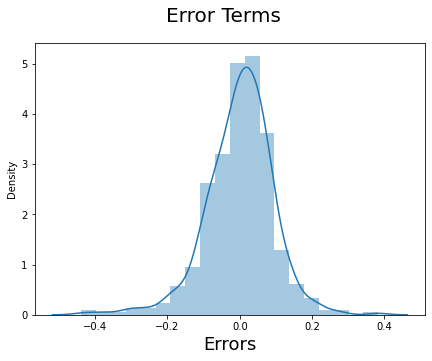

In [124]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

/Users/shwetabh.shekhar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shwetabh.shekhar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


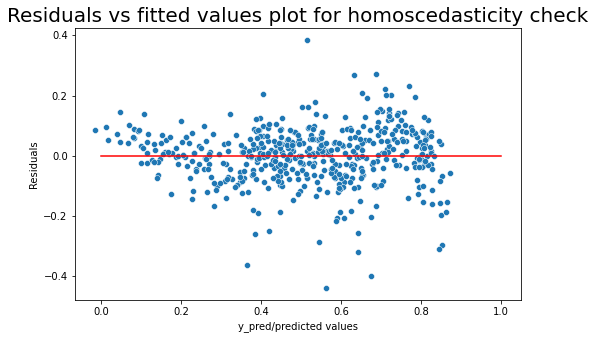

In [125]:
# Check for Homoscedasticity
# From the plot, we will see that residuals have equal or almost equal variance across the regression line.
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

### Making Pedictions

In [126]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [127]:
y_test = df_test.pop('count')
X_test = df_test

In [128]:
#Selecting the variables that were part of final model (Model 8).
col_test = X_train_rfe6.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.head()

const  year      temp  windspeed  Spring  Winter  \
184    1.0     0  0.831783   0.084219       0       0   
535    1.0     1  0.901354   0.153728       0       0   
299    1.0     0  0.511964   0.334206       0       1   
221    1.0     0  0.881625   0.339570       0       0   
152    1.0     0  0.817246   0.537414       0       0   

     Light rain_Light snow_Thunderstorm  Mist_cloudy  Jan  Sep  WorkingDay  
184                                   0            1    0    0           0  
535                                   0            0    0    0           1  
299                                   0            1    0    0           1  
221                                   0            0    0    0           1  
152                                   0            0    0    0           1

In [129]:
# Making predictions using the final model (lr8)

y_test_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_test_pred')

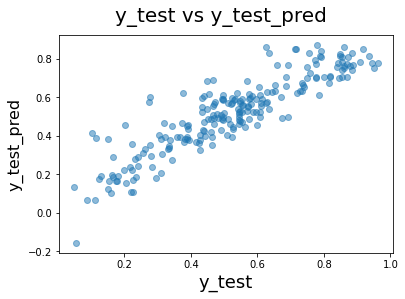

In [130]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

# Linear Relationship between y_test and y_pred

In [131]:
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 80.05
Train data r^2 : 82.75


# SUMMARY

### The top factors that are seen effecting and benefitting the Bike Rental count are as follows:

- year = 0.2359
- temp = 0.3896
- WorkingDay = 0.0238
- September = 0.0667

### The top variables that are negatively impacting the sales are

- Light rain_Light snow_Thunderstorm = -0.2884
- windspeed = -0.1445
- Spring = -0.1066